## Einleitung
Erste Schritte zum Einfinden in die Datenanalyse. Innerhalb dieses Pakets werden verschiedene Scatter sowie Boxplots visualisiert.

### Laden der Daten 
Zuerst wurden die Daten aus den CSV Dateien geladen. Die Daten wurden in einem DataFrame gespeichert.
Auch mussten die verwendeten DataFrames zusammengefügt werden.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")
#df = pd.read_csv("../data/yellow_tripdata_2020-04.csv", nrows=100)

/var/folders/wg/62v23f191zsbtpgk23vhgv2h0000gn/T/ipykernel_49245/3639171989.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/yellow_tripdata_2020-04.csv")


### Zusammenfassen von Zeitintervallen
Entsprechende zusätzliche Informationen wurden aus den bestehenden Daten entnommen und zusätzliche Spalten gefüllt. Dabei wurden vor allem Zeitintervalle zusammengefasst sowie die Fahrdauer berechnet.

In [2]:
# summarize time data (month/day/weekday/duration/hour)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
df['tpep_pickup_day_numeric'] = df['tpep_pickup_datetime'].dt.day
df['tpep_dropoff_day_numeric'] = df['tpep_dropoff_datetime'].dt.day
df['tpep_pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()
df['tpep_dropoff_day_name'] = df['tpep_dropoff_datetime'].dt.day_name()
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.strftime("%w").astype(int)
df['tpep_dropoff_day'] = df['tpep_dropoff_datetime'].dt.strftime("%w").astype(int)
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['tpep_dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['duration_hours'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'h')
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds

df['PULocationID'].fillna(-1, inplace=True)
df['DOLocationID'].fillna(-1, inplace=True)

### Zweites Bereinigen von fehlerhaften Daten (nur für Testdaten)
Dieser Schritt entfällt, nachdem die bereinigten Daten eingebunden wurden. Es handelt sich um eine grobe Bereinigung für Testwerte um Extremwerte und Ausreißer zu entfernen.

In [3]:
# clean data: allow only april data + positiv entries
df = df[ df.tpep_pickup_month == "April" ]
df = df[ df.trip_distance < 1000]
df = df[ df.fare_amount > 0]
df = df[ df.tip_amount > 0]
df = df[ df.total_amount > 0]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tpep_pickup_day_numeric,tpep_dropoff_day_numeric,tpep_pickup_day_name,tpep_dropoff_day_name,tpep_pickup_day,tpep_dropoff_day,tpep_pickup_hour,tpep_dropoff_hour,duration_hours,trip_duration
1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,...,1,1,Wednesday,Wednesday,3,3,0,1,0.223611,805
2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,...,1,1,Wednesday,Wednesday,3,3,0,0,0.149722,539
3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,...,1,1,Wednesday,Wednesday,3,3,0,0,0.166667,600
4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,...,1,1,Wednesday,Wednesday,3,3,0,0,0.083889,302
6,2,2020-04-01 00:56:56,2020-04-01 01:09:13,1.0,6.86,1.0,N,141,243,1,...,1,1,Wednesday,Wednesday,3,3,0,1,0.204722,737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238044,2,2020-04-30 23:51:19,2020-05-01 00:40:24,NaN,38.44,NaN,NaN,84,265,0,...,30,1,Thursday,Friday,4,5,23,0,0.818056,2945
238056,2,2020-04-30 23:02:19,2020-04-30 23:30:13,NaN,17.09,NaN,NaN,122,137,0,...,30,30,Thursday,Thursday,4,4,23,23,0.465000,1674
238057,2,2020-04-30 23:34:54,2020-05-01 00:04:22,NaN,16.48,NaN,NaN,75,63,0,...,30,1,Thursday,Friday,4,5,23,0,0.491111,1768
238063,2,2020-04-30 23:51:00,2020-05-01 00:25:00,NaN,18.28,NaN,NaN,81,63,0,...,30,1,Thursday,Friday,4,5,23,0,0.566667,2040


### Binninig: Zusammenfassung von Wertebereichen
Binning ist wichtig für spätere Auswertungen, da diese besser in Visualisierung dargestellt werden können. Grund dafür ist, dass Werte in Intervalle summiert werden. 

In [4]:
# binning
# Create the labels for the bin
bin_labels_total = [ 10, 20, 30, 50, 100, 500]
bin_labels_duration_hours = [0.05, 0.1, 0.5, 1, 5, 10]
bin_labels_tip = [ 1,2,5, 8,10]

# Define the scope of the bins
bins_total = [0, 10, 20, 30, 50, 100, 500]
bins_duration_hours = [0, 0.05, 0.1, 0.5, 1, 5, 10]
bins_tip = [0, 1, 2, 5,8 ,10]

# Create the "bins" column using the cut function using the bins and labels
df['bins_total'] = pd.cut(df['total_amount'], bins=bins_total, labels=bin_labels_total)
df['bins_duration_hours'] = pd.cut(df['duration_hours'], bins=bins_duration_hours, labels=bin_labels_duration_hours)
df['bins_tip'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=bin_labels_tip)

### Initialer Boxplot
Darstellung eines Boxplots sowie Ausgabe von statistischen Zahlen für die Einschätzung der Daten. 

**Ergebnis:**
 Zonen von 1 bis 265 vorhanden. Vor allem viele Fahrten im hohen Zonen Bereich vorhanden. Insgesamt aber eine geringe Aussagekraft, da Grund für den verschobenen Boxplot eine/mehrere summierte erhöhte Werte in Zonen im hohen Bereich vorhanden sein können.

count    130435.000000
mean        161.469015
std          69.228199
min           1.000000
25%         113.000000
50%         151.000000
75%         236.000000
max         265.000000
Name: PULocationID, dtype: float64


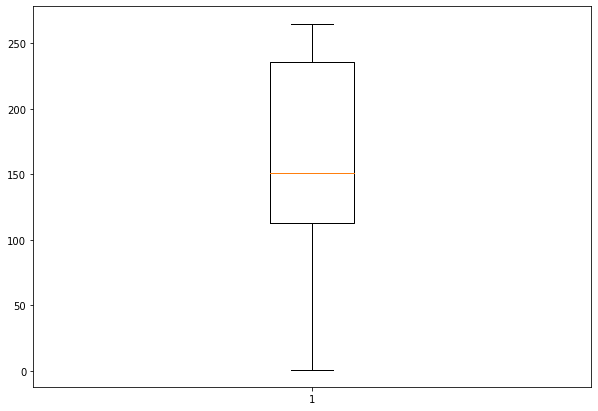

In [5]:
# boxplot
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
fig = plt.figure(figsize =(10, 7))

# Creating plot

plt.boxplot(df['PULocationID'])
#plt.boxplot(df['tpep_pickup_day_numeric'])
#plt.boxplot(df['fare_amount'])

# describe PUL
print(df['PULocationID'].describe())

# show plot
plt.show()

### Abhängigkeit von Fahrtantritten je Wochentag
Hier wurde die neu erstellte Dimension der Wochentage genutzt. Auch wurden die Pickups und Dropoffs gegenübergestellt.

**Ergebnis** Viele Fahrten am Donnerstag, wenige am Sonntag. --> Mögliche nicht bestätigte Schlussfolgerung kann sein, dass Bewohner Taxis mehr als Touristen nutzen.

<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_day_name', ylabel='count'>

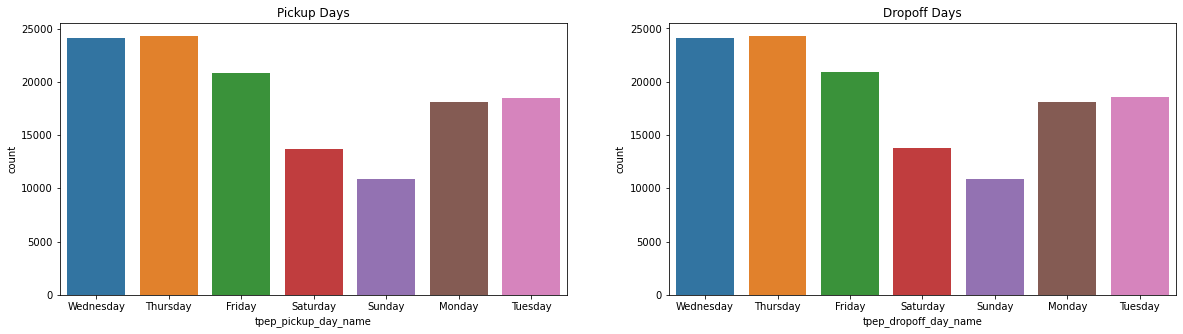

In [6]:
# trips per weekday
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_name",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_name",data=df,ax=ax2)

### Abhängigkeit von Fahrtantritten je Tag im Monat
Nachfolgend werden die Summe von Fahrten anhand der Tage im Monat gruppiert. Es wurde eine geringe Aussagekraft dieses Charts erwartet.

**Ergebnis**: Die vorherigen Ergebnisse zur Abhängigkeit von Fahrtantritten je Wochentag sind auch in diesem Chart zu erkennen. Ein Einbruch der Fahrten ist je am Samstag/Sonntag zu erkennen. Auch ist zu erkennen, dass die Tage (10, 17, 24) besonders erhöhte Werte sind. Dieses bestätigt die vorherige Grafik mit besonders Fahrten aufkommenden Tagen innerhalb der Woche. Es handelt sich immer um den gleichen Wochentag.  

<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_day_numeric', ylabel='count'>

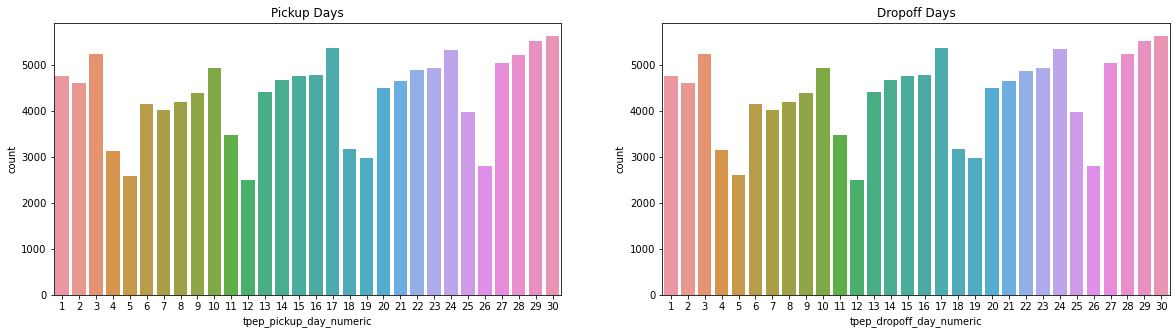

In [7]:
#trips per day
df_days = df.groupby(["tpep_pickup_day_numeric"]).mean()

figure, (ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_day_numeric",data=df,ax=ax3)
ax4.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_day_numeric",data=df,ax=ax4)

### Abhängigkeit von Fahrtantritten je Tageszeit im Stundenintervall
Die Stunden eines Tages wurden viusalisiert. Es  wurde keine Unterscheidung zwischen Wochentag und Wochenende getroffen

**Ergebnis**: Zwischen 6 Uhr und 18 Uhr sind besonders viele 

<AxesSubplot:title={'center':'Dropoff Days'}, xlabel='tpep_dropoff_hour', ylabel='count'>

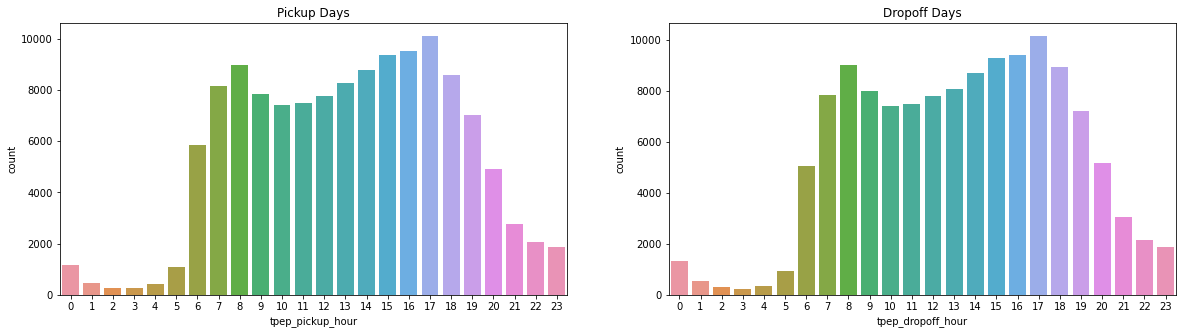

In [8]:
#trips per hour
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Pickup Days')
sns.countplot(x="tpep_pickup_hour",data=df,ax=ax5)
ax6.set_title('Dropoff Days')
sns.countplot(x="tpep_dropoff_hour",data=df,ax=ax6)

### Abhängigkeit von Fahrzeit und Anzahl der Passagiere
Nachfolgend wird eine mögliche Korrelation zwischen der Anzahl von Passagieren und der Dauer der Fahrt untersucht.
 
**Ergebnis**: Viele Kurzstrecken wurden durchgeführt. Darunter auch viele Fahrten mit nur einer Person. Einbruch bei 4 Passagieren durch den Einsatz ab dieser Personenanzahl eines Großraumtaxis zu erklären. Im Wertebereich von 5 bis 20 Stunden fast keine Fahrten durchgeführt.


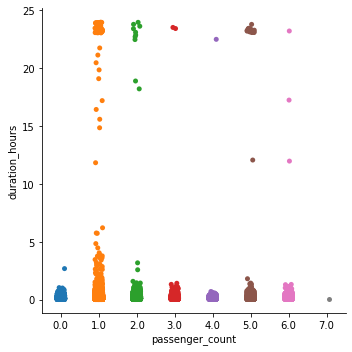

In [9]:
#duration/passenger_count
sns.catplot(y="duration_hours",x="passenger_count",data=df,kind="strip")

### Abhängigkeit von Gesamtpreis und Monatstag
**Ergebnis**: Sehr viele Fahrten mit einem Gesamtpreis der Fahrt bis 100 Dollar. Darüber hinaus gibt es nur Ausreißer. Es werden somit viele Fahrten für bis zu 100 Dollar durchgeführt. Die Fahrten darüber hinaus werden eher selten durchgeführt. In Bezug auf den Standort NYC ist dieses als realistisch einzuordnen.  

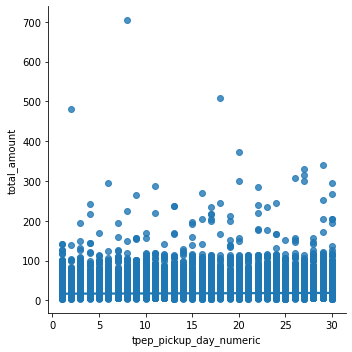

In [10]:
# days/total
sns.lmplot(data=df, x="tpep_pickup_day_numeric", y="total_amount")

### Abhängigkeit zwischen Wochentag/Dauer/Trinkgeld/Gesamtkosten
Nachfolgend soll eine Korrelation zwischen Wochentag/Dauer/Trinkgeld/Gesamtkosten untersucht werden. Als Visualiserung wurde zuerst ein Scatter Chart verwendet um die verschiedenen Dimensionen darzustellen.

**Ergebnis**: Unübersichtliche Darstellung und Dauer nicht richtig dargestellt. --> Einführung von Bins sinnvoll. (Siehe nächstes Chart)

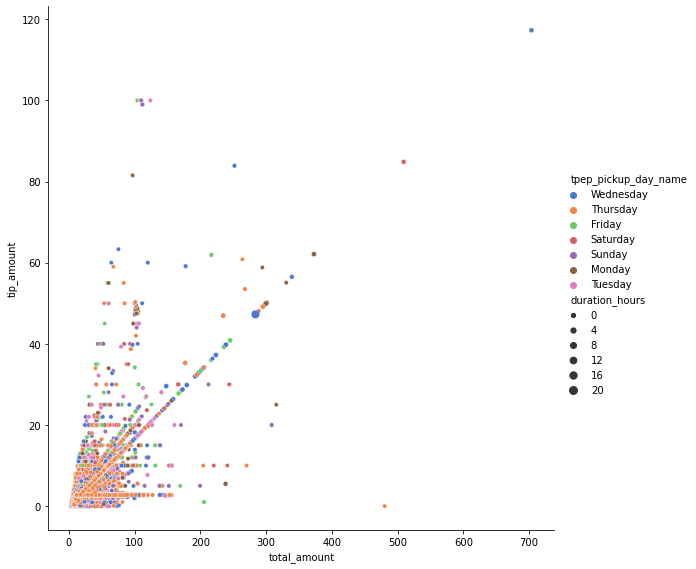

In [14]:
# total/tip/duration
sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day_name",
            alpha=0.99,
            palette="muted",
            height=8,
            data=df)

**Ergebnis**: Die Dimension der Dauer konnte erfolgreich abgebildet werden. Trotzdem ist die Darstellung unübersichtlich. Kein brauchbarer Informationsgehalt. --> Einführung von Gruppen zusätzlich zu dem Binning (siehe nächstes Chart)

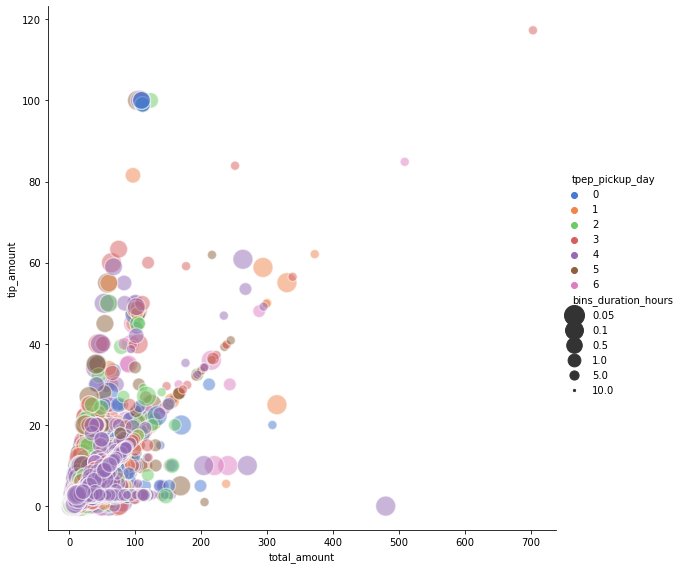

In [15]:
# total/tip/bin_duration
sns.relplot(x="total_amount", y="tip_amount", size="bins_duration_hours", hue="tpep_pickup_day",  sizes=(5,400),          alpha=0.5,  palette="muted",height=8,data=df)

Es wurde nach Wochentag gruppiert. Es wurde der Durchschnitt verwendet.
**Ergebnis**: Durchschnittlicher Betrag der Gesamtkosten betragen zwischen 17,3 Dollar und 17,9 Dollar. Die durchschnittliche Dauer beträgt zwischen 10,4 und 10,9 Minuten. Das durchschnittliche Trinkgeld beläuft sich auf 2,76 Dollar bis 2,9 Dollar. Es ist somit ein realtiv geringe Abweichung zwischen den einzelnen Wochentagen.

Herauszustellen ist dabei aber, dass am Sonntag (Tag 0) eine besonders hoher durchschnittliche Gesamtpreis sowie Trinkgeld zu verzeichenen ist. Es ist zudem ein korrelierender Zusammenhang zwischen Gesamtpreis und Trinkgeld zu verzeichnen. 

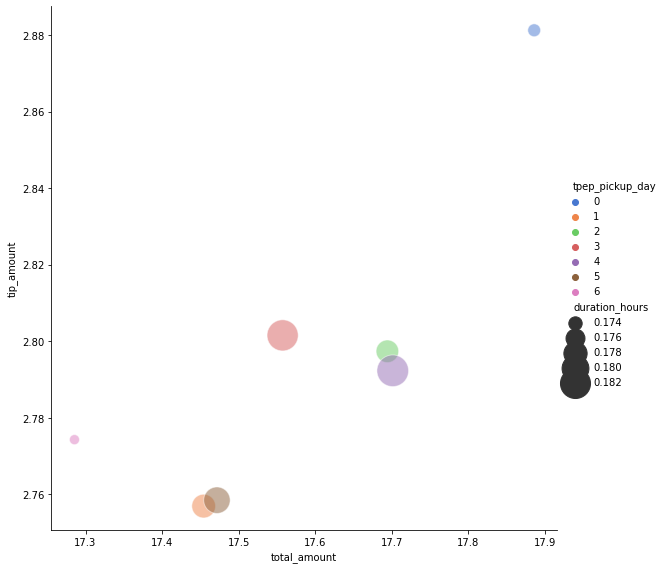

In [16]:
# total/tip/bin_duration (mean)
df_week_days = df.groupby(["tpep_pickup_day"]).mean()

sns.relplot(x="total_amount", y="tip_amount", size="duration_hours", hue="tpep_pickup_day",  sizes=(100,1000),          alpha=0.5,  palette="muted",height=8,data=df_week_days)